# Project HR

#### Predict attrition of valuable employees

In [1]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [3]:
# Preprocessing
df.shape

(1470, 35)

In [4]:
df.pop('EmployeeCount')
df.pop('EmployeeNumber')
df.pop('Over18')
df.pop('StandardHours')

0       80
1       80
2       80
3       80
4       80
        ..
1465    80
1466    80
1467    80
1468    80
1469    80
Name: StandardHours, Length: 1470, dtype: int64

In [5]:
df.columns

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')

In [6]:
df.shape

(1470, 31)

In [7]:
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2


In [8]:
# Value Initialization
y = df['Attrition']
X = df
X.pop('Attrition')

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [9]:
y.unique()

array(['Yes', 'No'], dtype=object)

In [10]:
from sklearn import preprocessing
le = preprocessing.LabelBinarizer()

In [11]:
y = le.fit_transform(y)

In [12]:
y.shape

(1470, 1)

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
Age                         1470 non-null int64
BusinessTravel              1470 non-null object
DailyRate                   1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome               1470 non-null int64
MonthlyRate                 1470 non-null int64
NumCompaniesWorked          1470 non-null int64
OverTime               

In [14]:
df.select_dtypes(['object'])

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus,OverTime
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [15]:
ind_BusinessTravel = pd.get_dummies(df['BusinessTravel'], prefix='BusinessTravel')
ind_Department = pd.get_dummies(df['Department'], prefix='Department')
ind_EducationField = pd.get_dummies(df['EducationField'], prefix='EducationField')
ind_Gender = pd.get_dummies(df['Gender'], prefix='Gender')
ind_JobRole = pd.get_dummies(df['JobRole'], prefix='JobRole')
ind_MaritalStatus = pd.get_dummies(df['MaritalStatus'], prefix='MaritalStatus')
ind_OverTime = pd.get_dummies(df['OverTime'], prefix='OverTime')

In [16]:
ind_BusinessTravel.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely
0,0,0,1
1,0,1,0
2,0,0,1
3,0,1,0
4,0,0,1


In [17]:
 df['BusinessTravel'].unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [18]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, ind_JobRole, ind_MaritalStatus, ind_OverTime])

C:\Users\Dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
df.select_dtypes(['int64'])

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [20]:
df1 = pd.concat([ind_BusinessTravel, ind_Department, ind_EducationField, ind_Gender, ind_JobRole, ind_MaritalStatus, ind_OverTime, df.select_dtypes(['int64'])], axis=1)

In [21]:
df1.shape

(1470, 51)

## Decision Tree

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df1, y)

In [23]:
from sklearn.tree import DecisionTreeClassifier

In [24]:
clf = DecisionTreeClassifier(random_state=42)

In [25]:
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=42, splitter='best')

In [26]:
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [27]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    '''
    print the accuracy score, classification report and confusion matrix of classifier
    '''
    if train:
        '''
        training performance
        '''
        print("Train Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_train, clf.predict(X_train))))
        print("Classification Report: \n {}\n".format(classification_report(y_train, clf.predict(X_train))))
        print("Confusion Matrix: \n {}\n".format(confusion_matrix(y_train, clf.predict(X_train))))
        
        res = cross_val_score(clf, X_train, y_train.ravel(), cv=10, scoring='accuracy')
        print("Average Accuracy: \t {0:.4f}".format(np.mean(res)))
        print("Accuracy SD: \t\t {0:.4f}".format(np.std(res)))
        
    elif train==False:
        '''
        test performance
        '''
        print("Test Result:\n")
        print("Accuracy Score: {0:.4f}\n".format(accuracy_score(y_test, clf.predict(X_test))))
        print("Classification Report: \n {}\n".format(classification_report(y_test, clf.predict(X_test))))
        print("Confusion Matrix: \n {}\n". format(confusion_matrix(y_test, clf.predict(X_test))))
        

In [28]:
print_score(clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[918   0]
 [  0 184]]

Average Accuracy: 	 0.7441
Accuracy SD: 		 0.0326


In [29]:
print_score(clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.7989

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.87      0.88       315
           1       0.33      0.40      0.36        53

    accuracy                           0.80       368
   macro avg       0.61      0.63      0.62       368
weighted avg       0.81      0.80      0.81       368


Confusion Matrix: 
 [[273  42]
 [ 32  21]]



***

## Bagging

In [30]:
from sklearn.ensemble import BaggingClassifier

In [31]:
bag_clf = BaggingClassifier(base_estimator=clf, n_estimators=5000,
                           bootstrap=True, n_jobs=-1, random_state=42)

In [32]:
bag_clf.fit(X_train, y_train.ravel())

BaggingClassifier(base_estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                        class_weight=None,
                                                        criterion='gini',
                                                        max_depth=None,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                                                        presort='deprecated',
                                                        random_state=42,
  

In [33]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[918   0]
 [  0 184]]

Average Accuracy: 	 0.8530
Accuracy SD: 		 0.0168


In [34]:
print_score(bag_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.8777

Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.99      0.93       315
           1       0.79      0.21      0.33        53

    accuracy                           0.88       368
   macro avg       0.83      0.60      0.63       368
weighted avg       0.87      0.88      0.85       368


Confusion Matrix: 
 [[312   3]
 [ 42  11]]



***

## Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf_clf = RandomForestClassifier(n_estimators=100)

In [37]:
rf_clf.fit(X_train, y_train.ravel())

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [38]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[918   0]
 [  0 184]]

Average Accuracy: 	 0.8539
Accuracy SD: 		 0.0125


In [39]:
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       315
           1       0.75      0.11      0.20        53

    accuracy                           0.87       368
   macro avg       0.81      0.55      0.56       368
weighted avg       0.85      0.87      0.82       368


Confusion Matrix: 
 [[313   2]
 [ 47   6]]



In [40]:
import seaborn as sns

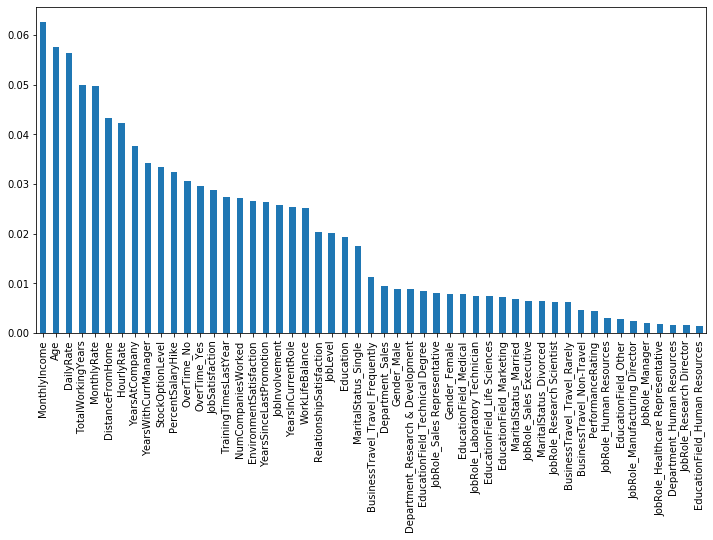

In [42]:
pd.Series(rf_clf.feature_importances_, index=X_train.columns).sort_values(
    ascending=False).plot(kind='bar', figsize=(12,6));

***

## AdaBoost

In [43]:
from sklearn.ensemble import AdaBoostClassifier

In [44]:
ada_clf = AdaBoostClassifier()

In [45]:
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)

In [46]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.8975

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       918
           1       0.83      0.48      0.61       184

    accuracy                           0.90      1102
   macro avg       0.87      0.73      0.78      1102
weighted avg       0.89      0.90      0.89      1102


Confusion Matrix: 
 [[900  18]
 [ 95  89]]

Average Accuracy: 	 0.8666
Accuracy SD: 		 0.0179


In [47]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.8641

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.92       315
           1       0.55      0.34      0.42        53

    accuracy                           0.86       368
   macro avg       0.72      0.65      0.67       368
weighted avg       0.85      0.86      0.85       368


Confusion Matrix: 
 [[300  15]
 [ 35  18]]



***

## AdaBoost with RandomForest

In [48]:
ada_clf = AdaBoostClassifier(RandomForestClassifier(n_estimators=100))
ada_clf.fit(X_train, y_train.ravel())

AdaBoostClassifier(algorithm='SAMME.R',
                   base_estimator=RandomForestClassifier(bootstrap=True,
                                                         ccp_alpha=0.0,
                                                         class_weight=None,
                                                         criterion='gini',
                                                         max_depth=None,
                                                         max_features='auto',
                                                         max_leaf_nodes=None,
                                                         max_samples=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                       

In [49]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 1.0000

Classification Report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       918
           1       1.00      1.00      1.00       184

    accuracy                           1.00      1102
   macro avg       1.00      1.00      1.00      1102
weighted avg       1.00      1.00      1.00      1102


Confusion Matrix: 
 [[918   0]
 [  0 184]]

Average Accuracy: 	 0.8512
Accuracy SD: 		 0.0154


In [50]:
print_score(ada_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.8668

Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       315
           1       0.70      0.13      0.22        53

    accuracy                           0.87       368
   macro avg       0.79      0.56      0.57       368
weighted avg       0.85      0.87      0.83       368


Confusion Matrix: 
 [[312   3]
 [ 46   7]]



***

## Gradient Boosting Classifier

In [51]:
from sklearn.ensemble import GradientBoostingClassifier

In [52]:
gbc_clf = GradientBoostingClassifier()
gbc_clf.fit(X_train, y_train.ravel())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [53]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=True)

Train Result:

Accuracy Score: 0.9528

Classification Report: 
               precision    recall  f1-score   support

           0       0.95      1.00      0.97       918
           1       0.98      0.73      0.84       184

    accuracy                           0.95      1102
   macro avg       0.96      0.87      0.91      1102
weighted avg       0.95      0.95      0.95      1102


Confusion Matrix: 
 [[915   3]
 [ 49 135]]

Average Accuracy: 	 0.8567
Accuracy SD: 		 0.0196


In [54]:
print_score(gbc_clf, X_train, y_train, X_test, y_test, train=False)

Test Result:

Accuracy Score: 0.8832

Classification Report: 
               precision    recall  f1-score   support

           0       0.90      0.98      0.93       315
           1       0.71      0.32      0.44        53

    accuracy                           0.88       368
   macro avg       0.80      0.65      0.69       368
weighted avg       0.87      0.88      0.86       368


Confusion Matrix: 
 [[308   7]
 [ 36  17]]



***

## XGBoost

In [55]:
import xgboost as xgb

In [56]:
xgb_clf = xgb.XGBClassifier()
xgb_clf.fit(X_train, y_train.ravel())

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=True)
print_score(xgb_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:

Accuracy Score: 0.9428

Classification Report: 
               precision    recall  f1-score   support

           0       0.94      1.00      0.97       918
           1       0.98      0.67      0.80       184

    accuracy                           0.94      1102
   macro avg       0.96      0.83      0.88      1102
weighted avg       0.95      0.94      0.94      1102


Confusion Matrix: 
 [[916   2]
 [ 61 123]]

Average Accuracy: 	 0.8630
Accuracy SD: 		 0.0191
Test Result:

Accuracy Score: 0.8832

Classification Report: 
               precision    recall  f1-score   support

           0       0.89      0.98      0.93       315
           1       0.73      0.30      0.43        53

    accuracy                           0.88       368
   macro avg       0.81      0.64      0.68       368
weighted avg       0.87      0.88      0.86       368


Confusion Matrix: 
 [[309   6]
 [ 37  16]]



***